# Stock Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as dr
from pandas_datareader import data
from datetime import datetime
import cvxopt as opt
from cvxopt import blas, solvers
# import requests_cache

In [2]:
# Define start and end date
end = datetime(2023, 4, 9)
start = datetime(2019, 8, 6)

In [29]:
# Create a list of the ticker symbols to be used in this project
tickers = ['AMZN', 'GOOGL', 'JNJ', 'V', 'PG', 'UNH', 'JPM', 'HD', 'VZ', 'NFLX', 'DIS', 'MRK', 'PEP', 'BAC', 'KO', 'WMT',
          'CVX', 'ABT', 'AMGN', 'MCD', 'COST', 'NKE', 'PM', 'QCOM', 'LOW', 'BA', 'LMT', 'SBUX', 'UPS', 'CAT']

tickers_short = ['AMZN', 'GOOGL', 'JNJ', 'V', 'PG']

In [19]:
# session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=300)
# session.headers = {     'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/109.0',     'Accept': 'application/json;charset=utf-8'     }

# # Obtain the adjusted closing prices from Yahoo Finance
# prices = pd.DataFrame()
# # prices = []
# for tick in tickers:
#     prices[tick] = data.DataReader(tick, data_source='yahoo', start=start, end=end, session = session)['Adj Close']
# prices.columns = tickers
    
# prices

In [37]:
start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2023-04-21']).astype(int)[0]//10**9 # convert to unix timestamp.
stock_ticker = 'AMZN'
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1.934000,1.953000,1.902500,1.935000,1.935000,248102000
1,2007-01-04,1.929500,1.957000,1.913000,1.945000,1.945000,126368000
2,2007-01-05,1.936000,1.939500,1.880000,1.918500,1.918500,132394000
3,2007-01-08,1.911000,1.915500,1.858500,1.875000,1.875000,135660000
4,2007-01-09,1.880000,1.903000,1.867000,1.889000,1.889000,114060000
...,...,...,...,...,...,...,...
4098,2023-04-14,102.070000,103.199997,101.110001,102.510002,102.510002,51388300
4099,2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500
4100,2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500
4101,2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900


In [38]:
# df2 = df[['Date', 'Adj Close', 'Volume']].copy()
# df2

# df_list = []
# df_list.append(df)
# df_list.append(df2)
# df_list[1]

In [45]:
# df_prices = []
# df_vol = []
# df_prices = pd.DataFrame()
# df_volumes = pd.DataFrame()


# for tick in tickers:
#     url = 'https://query1.finance.yahoo.com/v7/finance/download/' + tick + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
#     df = pd.read_csv(url)
#     df = df.set_index('Date')
#     df_prices[tick] = df['Adj Close']
#     df_volumes[tick] = df['Volume']

#     df_prices.append(df['Adj Close'])
#     df_vol.append(df['Volume'])


# df_prices.columns = tickers
# df_volumes.columns = tickers

In [47]:
display(len(df_list))
df_list[0]

30

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1.934000,1.953000,1.902500,1.935000,1.935000,248102000
1,2007-01-04,1.929500,1.957000,1.913000,1.945000,1.945000,126368000
2,2007-01-05,1.936000,1.939500,1.880000,1.918500,1.918500,132394000
3,2007-01-08,1.911000,1.915500,1.858500,1.875000,1.875000,135660000
4,2007-01-09,1.880000,1.903000,1.867000,1.889000,1.889000,114060000
...,...,...,...,...,...,...,...
4098,2023-04-14,102.070000,103.199997,101.110001,102.510002,102.510002,51388300
4099,2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500
4100,2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500
4101,2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900


In [48]:
df_list[0]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1.934000,1.953000,1.902500,1.935000,1.935000,248102000
1,2007-01-04,1.929500,1.957000,1.913000,1.945000,1.945000,126368000
2,2007-01-05,1.936000,1.939500,1.880000,1.918500,1.918500,132394000
3,2007-01-08,1.911000,1.915500,1.858500,1.875000,1.875000,135660000
4,2007-01-09,1.880000,1.903000,1.867000,1.889000,1.889000,114060000
...,...,...,...,...,...,...,...
4098,2023-04-14,102.070000,103.199997,101.110001,102.510002,102.510002,51388300
4099,2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500
4100,2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500
4101,2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900


In [53]:
df_list[0].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1.9340,1.9530,1.9025,1.9350,1.9350,248102000
1,2007-01-04,1.9295,1.9570,1.9130,1.9450,1.9450,126368000
2,2007-01-05,1.9360,1.9395,1.8800,1.9185,1.9185,132394000
3,2007-01-08,1.9110,1.9155,1.8585,1.8750,1.8750,135660000
4,2007-01-09,1.8800,1.9030,1.8670,1.8890,1.8890,114060000


## Plot the time series

Plot the time series data in a normalised fashion.

Text(0.5, 1.0, 'Stock Time Series 2015 - 2020')

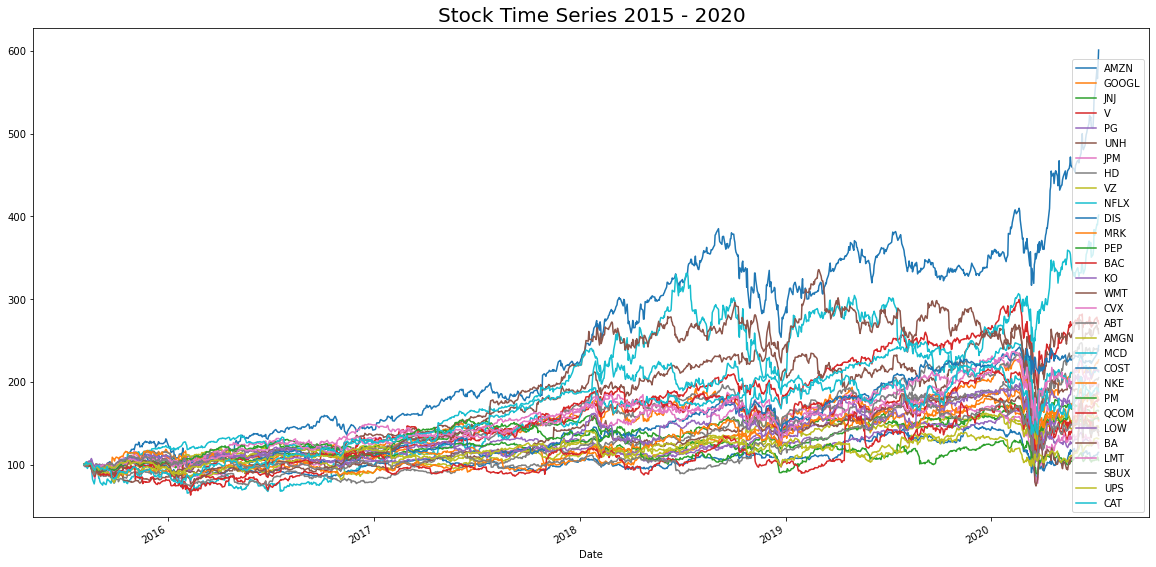

In [6]:
normalised = prices / prices.iloc[0] * 100
normalised.plot(figsize=(20, 10))
plt.title('Stock Time Series 2015 - 2020', fontsize=20)

## Mean-Variance Portfolio Allocation

For the mean-variance portfolio allocation and optimisation we first need to caluclate the log returns of the stocks included in the portfolio.

In [7]:
# Calculate the log returns
log_r = np.log(prices / prices.shift(1))

Thanks to log-normality we can annualise log returns fairly easily.

In [8]:
# Compute the annualised returns
annual_r = log_r.mean() * 252
annual_r

AMZN     0.364801
GOOGL    0.166390
JNJ      0.101646
V        0.202258
PG       0.127661
UNH      0.193053
JPM      0.087335
HD       0.176956
VZ       0.075284
NFLX     0.282745
DIS      0.028057
MRK      0.086302
PEP      0.089327
BAC      0.068530
KO       0.042845
WMT      0.137755
CVX      0.036992
ABT      0.146036
AMGN     0.107866
MCD      0.152990
COST     0.181338
NKE      0.117742
PM       0.009807
QCOM     0.117416
LOW      0.154564
BA       0.061301
LMT      0.125407
SBUX     0.069040
UPS      0.055318
CAT      0.128519
dtype: float64

Under the assumptions of independent and identically distributed returns we can also annualise the covariance matrix using trading days.

In [9]:
cov_matrix = log_r.cov() * 252

In [10]:
var = log_r.var() * 252

Next, I will generate random weights for all of the 30 stocks, which will make up the randomly generated portfolios, under a combination of assumptions. The assumptions are that only long positions are allowed, which ultimately means that the investor's wealth has to be divided among all available stocks through positive positions, and the positions have to add up to 100%, i.e. no additional borrowing and investing more than 100% of wealth.

In [11]:
# Get the total number of stocks used
num_stocks = len(tickers)

# Generate 30 random weights between 0 and 1
weights = np.random.random(num_stocks)

# Constrain these weights to add up to 1
weights /= np.sum(weights)

weights

array([0.01257842, 0.03961074, 0.0545906 , 0.03287598, 0.00876508,
       0.0014973 , 0.05074571, 0.05496373, 0.04900893, 0.04639473,
       0.00218345, 0.02842679, 0.04777599, 0.0487113 , 0.00027833,
       0.06269555, 0.01046315, 0.00295621, 0.02275558, 0.03326395,
       0.0347877 , 0.00083594, 0.02444533, 0.05621331, 0.05118809,
       0.01604502, 0.06120425, 0.04108004, 0.05074923, 0.05290957])

Assuming that historical mean performance of the stocks making up the portfolio is the best estimator for future, i.e. expected, performance, expected portfolio return can be calculated as a product of the transpose of the weights vector and the expected returns vector of the stocks making up the portfolio.

In [12]:
# Example of what the portfolio return would look like given the above weights
ptf_r = np.sum(annual_r * weights)
ptf_r

0.1251437678253807

Given the portfolio covariance matrix computed above, the expected portfolio variance can be calculatd as the dot product of the transpose of the weights vector, the covariance matrix and the weights vector.

In [13]:
# Compute portfolio variance
ptf_var = np.dot(weights.T, np.dot(cov_matrix, weights))
ptf_var

0.035662820261457236

The expected portfolio standard deviation is simply teh square root of the variance.

In [14]:
# Calculate the standard deviation
ptf_std = np.sqrt(ptf_var)
ptf_std

0.18884602262546393

Using the computational concepts introduced so far we can generate many random portfolios and plot their returns against their risk (standard deviation), often referred to as volatility.

In [15]:
# Define a function to generate N number of random portfolios given a DataFrame of log returns
def generate_ptfs(returns, N):
    ptf_rs = []
    ptf_stds = []
    for i in range(N):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        ptf_rs.append(np.sum(returns.mean() * weights) * 252)
        ptf_stds.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    ptf_rs = np.array(ptf_rs)
    ptf_stds = np.array(ptf_stds)
    return ptf_rs, ptf_stds

Comparing portfolio returns and volatilities across portfolios is made a lot easier by computing a ratio of the two measures. The most common ratio that takes into consideration is the Sharpe ratio, which is a measure of the amount of excess return an investor can expect per unit of volatility (remember this is a measure of risk) that a portfolio provides. Because we assume that investors want to maximise returns while minimising risk, the higher this ratio the better.

In [16]:
# Generate the return and volatility of 5000 random portfolios
ptf_rs, ptf_stds = generate_ptfs(log_r, 5000)

Text(0.5, 1.0, '5000 Randomly Generated Portfolios In The Risk-Return Space')

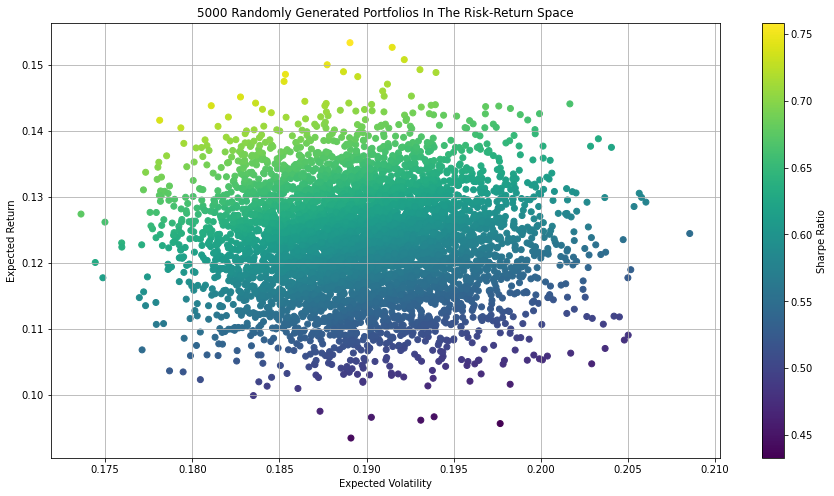

In [17]:
# Plot the 5000 randomly generated portfolio returns and volatilities and colormark the respective Sharpe ratios

plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('5000 Randomly Generated Portfolios In The Risk-Return Space')

Finding the optimal portfolios requires a constrained optimisation in which we maximise the Sharpe ratio. To begin, we need a function that returns the portfolio statistics that we computed previously, namely weights, portflio return, portfolio volatility and, based on the latter two, the portfolio Sharpe ratio.

In [18]:
# Define a function that returns the portfolio statistics
def ptf_stats(weights):
    weights = np.array(weights)
    ptf_r = np.sum(log_r.mean() * weights) * 252
    ptf_std = np.sqrt(np.dot(weights.T, np.dot(log_r.cov() * 252, weights)))
    return np.array([ptf_r, ptf_std, (ptf_r - 0.01) / ptf_std])

In [19]:
# Import the optimise sublibrary
import scipy.optimize as sco

In [20]:
# Minimise the negative value of the Sharpe ratio
def min_sharpe(weights):
    return -ptf_stats(weights)[2]

In [21]:
# Write the constraint that the weights have to add up to 1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bound the weights (parameter inputs) to be within 0 and 1
bnds = tuple((0, 1) for x in range(num_stocks))

In [22]:
# Starting parameter (weights) list as equal distribution
starting_ws = num_stocks * [1. / num_stocks,]

In [23]:
# Call the minimisation function
opts = sco.minimize(min_sharpe, starting_ws, method='SLSQP', bounds=bnds, constraints=cons)

In [24]:
# Inspect the results
opts

     fun: -1.2447270990257568
     jac: array([-0.04569581,  0.35473201,  0.08991945,  0.02190912, -0.04601899,
       -0.04620151,  0.42264192,  0.03831641,  0.06384982,  0.07974467,
        0.60326771,  0.14188395,  0.18983611,  0.62042643,  0.28499931,
       -0.04610339,  0.57938004,  0.14048705,  0.29620732, -0.04546306,
       -0.04568657,  0.27223389,  0.51781458,  0.37746765,  0.16528107,
        0.70034227,  0.03754424,  0.53443529,  0.43791433,  0.26703672])
 message: 'Optimization terminated successfully'
    nfev: 249
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([5.85604301e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.47044191e-02, 6.13321864e-03, 7.04968581e-17, 2.57630153e-16,
       1.38998107e-17, 0.00000000e+00, 0.00000000e+00, 8.89841992e-17,
       0.00000000e+00, 9.87928408e-17, 0.00000000e+00, 4.27581460e-02,
       0.00000000e+00, 0.00000000e+00, 9.41307714e-17, 9.76169744e-02,
       2.33182941e-01, 7.11356905e-17, 0.0000000

In the results of the optimisation, the variable x stores the weights for the stocks making up the optimal portfolio. In the case of the 30 US stocks, there seem to be quite a few stocks with weights of zero, i.e. no capital allocated to them.

In [25]:
# Obtain the optimal weights
weights_opt = opts['x'].round(3)
weights_opt

array([0.586, 0.   , 0.   , 0.   , 0.035, 0.006, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.043, 0.   , 0.   ,
       0.   , 0.098, 0.233, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   ])

Plugging these weights into the portfolio statistics function above we can get the expected return, expected volatility and Sharpe ratio of the portfolio with the optimal weights.

In [26]:
# Plug optimal weights into the statistics function
ptf_stats(weights_opt)

array([0.28256824, 0.2189703 , 1.24477266])

The expected return is roughly 27.3%, the expected volatility is close to 21.7% and the Sharpe ratio is 1.2.

Next, we can obtain the absolute minimum variance portfolio. As the name suggests, in order to obtain this portfolio, we minimise the portfolio variance.

In [27]:
# Define a function that minimises portfolio variance
def min_var(weights):
    # Remember that variance is just standard deviation (volatility) squared
    return ptf_stats(weights)[1]**2

In [28]:
# Call the optimisation fcuntion
opt_var = sco.minimize(min_var, starting_ws, method='SLSQP', bounds=bnds, constraints=cons)

In [29]:
# Inspect the results
opt_var

     fun: 0.023388328040564493
     jac: array([0.04712902, 0.04997428, 0.04665433, 0.05415988, 0.04699294,
       0.05364572, 0.05769459, 0.05399023, 0.04688862, 0.04755651,
       0.04762143, 0.04675747, 0.05078473, 0.06165088, 0.04659294,
       0.04649957, 0.0566762 , 0.05325136, 0.05012625, 0.04696303,
       0.04674234, 0.05045175, 0.0480072 , 0.05347921, 0.05543549,
       0.06751404, 0.04683898, 0.05328159, 0.04686168, 0.05262724])
 message: 'Optimization terminated successfully'
    nfev: 435
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([5.82870764e-02, 3.40168432e-18, 1.19131119e-01, 5.42101086e-18,
       4.58699050e-02, 4.01154804e-18, 0.00000000e+00, 1.08420217e-18,
       2.35234718e-01, 4.35608808e-03, 2.27682456e-18, 3.79133521e-02,
       1.13841228e-17, 0.00000000e+00, 1.53447717e-01, 1.20596160e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.11371574e-02,
       8.06225471e-02, 0.00000000e+00, 7.58941521e-18, 0.00000000e+00,
    

For the absolute minimum variance portfolio, more portflios are invested in or, put differently, there are less stocks with weighst of zero.

In [30]:
# Obtain the optimal weights
weights_opt_var = opt_var['x'].round(3)
weights_opt_var

array([0.058, 0.   , 0.119, 0.   , 0.046, 0.   , 0.   , 0.   , 0.235,
       0.004, 0.   , 0.038, 0.   , 0.   , 0.153, 0.121, 0.   , 0.   ,
       0.   , 0.081, 0.081, 0.   , 0.   , 0.   , 0.   , 0.   , 0.011,
       0.   , 0.052, 0.   ])

In [31]:
# Get the statistics for the absolute minimum variance portfolio
ptf_stats(weights_opt_var)

array([0.11578919, 0.1527782 , 0.69243642])

Using the same logic applied previously, we can compute all optimal portfolios, i.e. all portflios with the maximum return for a given risk level, by iterating over multiple starting conditions.

In [32]:
# Set up two conditions, one for the target return level and one for the sum of the portfolio weights
cons2 = ({'type': 'eq', 'fun': lambda x: ptf_stats(x)[0] - r},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# The boundary condition stays the same
bnds2 = tuple((0, 1) for x in weights)

In [33]:
# Define a function that returns the volatility of a portfolio given a vector of weights
def min_port(weights):
    return ptf_stats(weights)[1]

In [34]:
# Define a function to get the target returns and volatilities given a range of returns
def efficient_frontier(start_r, end_r, steps):
    target_rs = np.linspace(start_r, end_r, steps)
    target_stds = []
    for r in target_rs:
        cons2 = ({'type': 'eq', 'fun': lambda x: ptf_stats(x)[0] - r},
                {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bnds2 = tuple((0, 1) for x in weights)
        res = sco.minimize(min_port, starting_ws, method='SLSQP', bounds = bnds2, constraints=cons2)
        target_stds.append(res['fun'])
    target_stds = np.array(target_stds)
    return target_rs, target_stds

Based on the random portfolio visualisation above it seems as though a target return of 30% would be a good upper bound

In [35]:
# Obtain the target returns and volatilities based on 50 target returns
target_rs, target_stds = efficient_frontier(0.0, 0.30, 50)

Text(0.5, 1.0, 'Efficient Frontier Using 30 US Stocks')

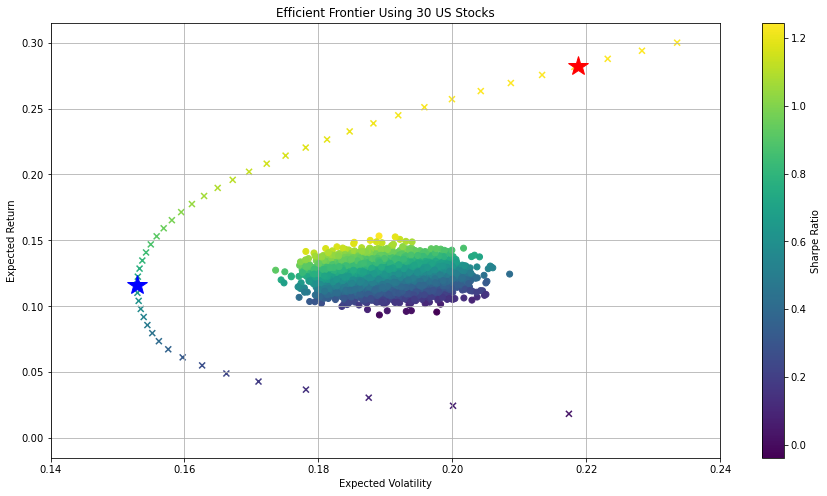

In [36]:
# Plot the efficient frontier in the same visualisation as the randomly generated portfolios
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.scatter(target_stds, target_rs, c=(target_rs - 0.01)/target_stds, marker='x')
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=20.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.14, 0.24)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier Using 30 US Stocks')

The visualisation above shows the efficient frontier, i.e. the frontier comprised of all optimal portfolios that maximise the expected return for a given level of expected volatility. The blue star depicts the absolute minimum variance portfolio and the red star depicts the absolute maximum Sharpe ratio portfolio. Note that any portflio that lies on the frontier but is below the blue star is not an optimal or efficient portfolio as it does not dominate all other portflios in terms of expected return given a certain risk level but rather is dominated by teh others.

A question that may arise here is: why is the efficient frontier so far away from the cluster of randomly selected portfolios? For those that have seen efficient portfolios being taught at university or online will have likely seen a visualisation in which the efficient frontier appears to touch the outer bound of the cluster of randomly generated portfolios, which makes the intuitive understanding behind it more clear. The reason why that isn't the case here is that the portfolio weights used to randomly generate the random portfolios lie between 0 and 1. This means that every stock in the portfolio has at least some positive weight. As I pointed out above, in both the absolute minimum variance portflio as well as the maximum Sharpe ratio portfolio a lot of the stocks in the portflio have a weight of zero. This is because the minimisation function determined the optimal weights for each stock in the portfolio based on the stocks expected return and covariance with all other stocks. Due to the expected return and covariance profiles of some stocks, the optimal weight for those just happened to be zero. Let's investigate that further.

In order to understand this further, I will use the very first set of randomly selected weights from early in this project and include its expected return and expected volatility in the above visualisation. In the visualisation below, the white star represents the portfolio based on the initially generated random weights.

Text(0.5, 1.0, 'Efficient Frontier Using 30 US Stocks')

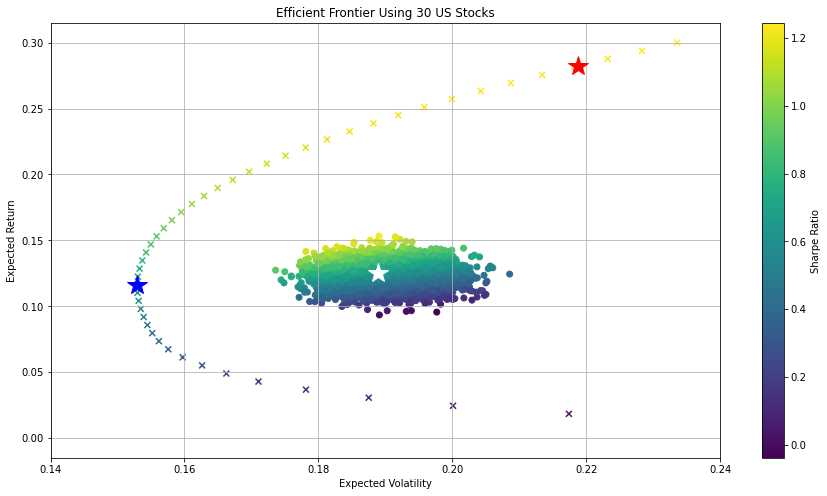

In [37]:
# Include the initially generated random weights
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.scatter(target_stds, target_rs, c=(target_rs - 0.01)/target_stds, marker='x')
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=20.0)
plt.plot(ptf_stats(weights)[1], ptf_stats(weights)[0], 'w*', markersize=20.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.14, 0.24)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier Using 30 US Stocks')

As we can see the white star is located somewhere left of the center of the cluster. Let's look at the portfolio composition of the maximum Sharpe ratio portfolio and the one represented by the white star.

In [38]:
# Create DataFrame of the weighst assigned to each ticker
composition = {'Expected Return': annual_r.round(3), 'Maximum Sharpe': weights_opt, 'White Star': weights.round(3)}
comp = pd.DataFrame(composition, columns = ['Expected Return', 'Maximum Sharpe', 'White Star'], index=tickers)
comp

,Expected Return,Maximum Sharpe,White Star
AMZN,0.365,0.586,0.013
GOOGL,0.166,0.000,0.040
JNJ,0.102,0.000,0.055
V,0.202,0.000,0.033
PG,0.128,0.035,0.009
UNH,0.193,0.006,0.001
JPM,0.087,0.000,0.051
HD,0.177,0.000,0.055
VZ,0.075,0.000,0.049
NFLX,0.283,0.000,0.046


To get a possible explanation of why the portfolio weights are allocated the way they are I have included the expected return for each stock in the table above. For better insights we will also look at the correlation matrix.

In [39]:
# Inspect the correlation matrix
corr_matrix = log_r.corr()
corr_matrix

,AMZN,GOOGL,JNJ,V,PG,UNH,JPM,HD,VZ,NFLX,...,COST,NKE,PM,QCOM,LOW,BA,LMT,SBUX,UPS,CAT
AMZN,1.000000,0.690686,0.354668,0.531249,0.313335,0.403887,0.371400,0.438288,0.232592,0.579468,...,0.408775,0.394732,0.261981,0.368944,0.371311,0.311589,0.324892,0.426887,0.400846,0.407993
GOOGL,0.690686,1.000000,0.475132,0.717345,0.428681,0.535900,0.547779,0.586785,0.338610,0.537067,...,0.471583,0.522889,0.401899,0.476897,0.515120,0.463705,0.447007,0.577674,0.482383,0.509606
JNJ,0.354668,0.475132,1.000000,0.521272,0.585018,0.511444,0.476945,0.461541,0.502653,0.252578,...,0.489176,0.424262,0.443962,0.374874,0.378820,0.376238,0.496025,0.457311,0.459377,0.429779
V,0.531249,0.717345,0.521272,1.000000,0.489192,0.594206,0.673598,0.674008,0.379578,0.436790,...,0.473968,0.604835,0.457438,0.507143,0.608026,0.564280,0.548275,0.654316,0.529058,0.567374
PG,0.313335,0.428681,0.585018,0.489192,1.000000,0.417543,0.438164,0.476130,0.542044,0.224362,...,0.476220,0.408114,0.534722,0.352770,0.381550,0.347829,0.491285,0.463447,0.463210,0.373703
UNH,0.403887,0.535900,0.511444,0.594206,0.417543,1.000000,0.561158,0.572096,0.384825,0.366017,...,0.429572,0.489727,0.458249,0.394911,0.532663,0.473126,0.470930,0.524070,0.459240,0.452385
JPM,0.371400,0.547779,0.476945,0.673598,0.438164,0.561158,1.000000,0.643651,0.411945,0.305215,...,0.412300,0.543252,0.465208,0.488902,0.607478,0.631453,0.530091,0.592859,0.556630,0.648541
HD,0.438288,0.586785,0.461541,0.674008,0.476130,0.572096,0.643651,1.000000,0.429061,0.372787,...,0.519797,0.591886,0.504582,0.501455,0.803450,0.565866,0.512039,0.622640,0.526748,0.515284
VZ,0.232592,0.338610,0.502653,0.379578,0.542044,0.384825,0.411945,0.429061,1.000000,0.158881,...,0.441915,0.351757,0.442225,0.302904,0.361034,0.302610,0.399330,0.390469,0.389939,0.348640
NFLX,0.579468,0.537067,0.252578,0.436790,0.224362,0.366017,0.305215,0.372787,0.158881,1.000000,...,0.325120,0.329809,0.224274,0.336213,0.331237,0.269643,0.286101,0.323841,0.326346,0.321461


Looking at the composition table we can see that Amazon has the highest expected return of all stocks in the portfolio and makes up 57.7% of the maximum Sharpe ratio portfolio. Google has a relatively high expected return as well but has a weight of zero. Why might that be? 

That is where the correlation matrix comes in. Google's returns have the highest correlation with Amazon's returns (as to be expected). Therefore, despite Google's expected return being decent, adding it to the portflio would not result in a lot of diversification, which gives a plausible explanation for the exclusion of its stock in the maximum Sharpe ratio portfolio. Looking at McDonald's on the other hand we can see that its stock has an expected return of 15.4% and has a relatively low correlation with Amazon's stock. Following the same logic, McDonald's stock would lead to decent diversification while maintaining a high level of expected return.

Statements like these have to be made with caution because in a portfolio allocation one cannot conclude anything by just looking at expected returns and correlation of two assets in isolatio but rather always needs to look at the portfolio as a whole. But because that is very difficult to do, the example of Amazon, Google and McDonald's is a good starting point to understand the underlying logic.

Comparing the asset allocation of the maximum Sharpe ratio portfolio to that of the portflio represented by the white star we can see that the latter overallocates to less "valuable" stocks (valuable here is meant in the sense of adding to diversification of the portfolio while also contributing to expected return) and underallocates to more "valuable" stocks.

## Capital Market Line

Once we have the efficient portfolio we can add a riskless asset, i.e. cash to the mix. Investing in the riskless asset and the efficient portflio greatly enhances the efficient investment opportunity set for the investor and gives them a way to find an efficient capital allocation that matches their risk appetite. By adjusting the portion of the total wealth invested in teh riskless asset, the investor can (in theory) achieve any risk-return profile that lies on the straight line between the riskless asset and the efficient portfolio (and theoretically beyond that point by borrowing).

In [153]:
# Import cubic splines interpolation module
import scipy.interpolate as sci

In [154]:
# Select the index of the absolute minimum variance portfolio
min_var = np.argmin(target_stds)

# Select expected volatilities for the stocks on the efficient frontier
ex_stds = target_stds[min_var:]

# Select expected returns for the stocks on the efficient frontier
ex_rs = target_rs[min_var:]

These ndarray objects can then be used for the interpolation. B-spline interpolation takes sets of adjacent points and constructs a ploynomial passing through those points. Essentially, what the interpolation gives us is a continuous function that approximates the efficient frontier. This function can then be differentiated in order to find the slope of the line that is tangent to the efficient frontier and passes through the riskless asset.

In [155]:
# Interpolate the B-spline representation of the data points
tck = sci.splrep(ex_stds, ex_rs)

In [156]:
# Obtain coordinates to be used for plotting the B-spline interpolation of the efficient frontier
x_lower = min(ex_stds)
x_upper = max(ex_stds)
x_range = np.linspace(x_lower, x_upper, 500)
bspline = sci.splev(x_range, tck)

Text(0.5, 1.0, 'Efficient Frontier Using 30 US Stocks')

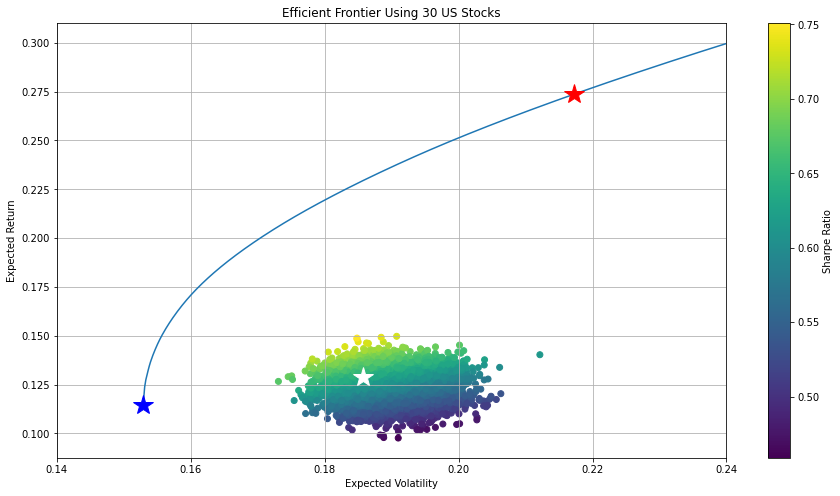

In [253]:
# Plot the B-spline interpolation of the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o')
plt.plot(x_range, bspline)
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=20.0)
plt.plot(ptf_stats(weights)[1], ptf_stats(weights)[0], 'w*', markersize=20.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.14, 0.24)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier Using 30 US Stocks')

The B-spline interpolation can be used to find a cintinuously differentiable function and, more interestingly, its derivatives.

In [158]:
# Define a continuously differentiable function f(x) for the efficient frontier
def f(x):
    return sci.splev(x, tck, der=0)

# Define the first derivate function of f(x)
def df(x):
    return sci.splev(x, tck, der=1)

Assuming a risk-free rate of return of 1% and a parameter set p=(a,b,x) we can set up a system of equations for the capital market line.

In [159]:
def cml_conditions(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

Provided with an initial parameterisation in addition to the system of equations, the optimisation function fsolve is capable of solving the system of equation.

In [160]:
# Solve for the parameters of the Capital Market Line
cml = sco.fsolve(cml_conditions, [0.01, 0.5, 0.15])

In [222]:
# Create input variable for CML
cx = np.linspace(0.0, 0.3)

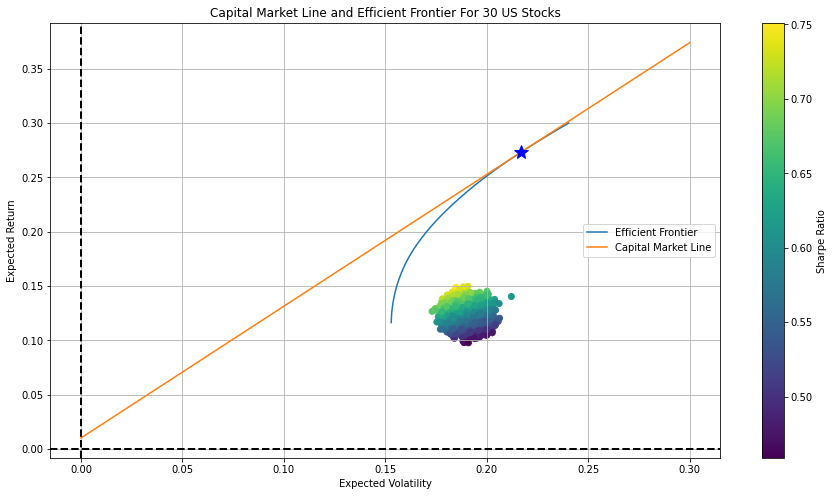

In [264]:
# Plot the resulting Capital Market Line together with the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o') # Random portfolios
plt.plot(x_range, bspline, label='Efficient Frontier') # Efficient Frontier
plt.plot(cx, cml[0] + cml[1] * cx, lw=1.5, label='Capital Market Line') # Capital Market Line
plt.plot(cml[2], f(cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent line passes through rf
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Capital Market Line and Efficient Frontier For 30 US Stocks')
plt.legend(loc=7)

This visualisation gives the full picture in terms of where the Capital Market Line starts and puts the efficient frontier into a broader perspective in terms of where in the risk-return space it lies but I would like to get a closer view of the tangent line and the efficient frontier.

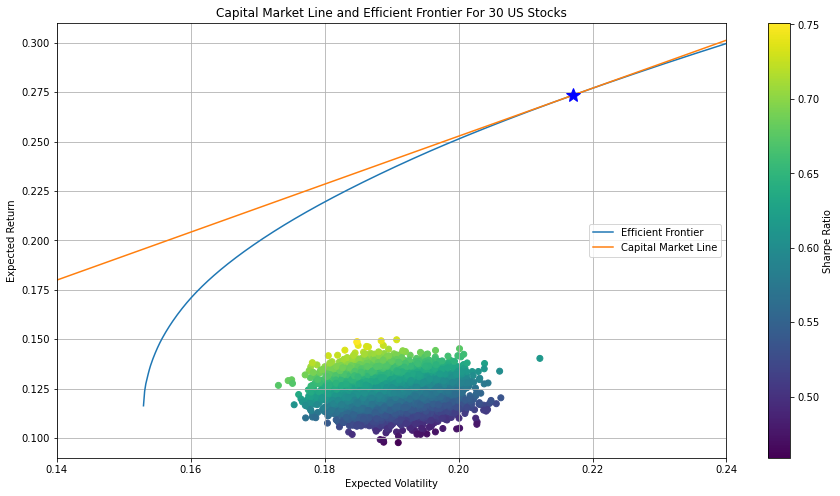

In [263]:
# Zoom in on Capital Market Line together with the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o') # Random portfolios
plt.plot(x_range, bspline, label='Efficient Frontier') # Efficient Frontier
plt.plot(cx, cml[0] + cml[1] * cx, lw=1.5, label='Capital Market Line') # Capital Market Line
plt.plot(cml[2], f(cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent line passes through rf
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.14, 0.24)
plt.ylim(0.09, 0.31)
plt.colorbar(label='Sharpe Ratio')
plt.title('Capital Market Line and Efficient Frontier For 30 US Stocks')
plt.legend(loc=7)

In the visualisation above, the blue star represents the optimal portfolio from the efficient frontier where the tangent line passes through the riskless asset.

## Including metals

In [299]:
# Obtain Gold and Silver prices
gold = data.DataReader('GC=F', data_source='yahoo', start=start, end=end)['Adj Close']
silver = data.DataReader('SI=F', data_source='yahoo', start=start, end=end)['Adj Close']

In [300]:
# Create metals dataframe
metal_data = {'GC': gold, 'SI': silver}
metal_price = pd.DataFrame(metal_data)
metal_prices = metal_price.iloc[3:]
metal_prices

,GC,SI
Date,,
2015-08-10,1104.199951,15.289000
2015-08-11,1107.599976,15.281000
2015-08-12,1123.199951,15.473000
2015-08-13,1115.699951,15.396000
2015-08-14,1112.900024,15.210000
...,...,...
2020-07-05,1786.800049,18.340000
2020-07-06,1794.699951,18.615000
2020-07-07,1807.599976,18.615000


## Plot the metals time series

Text(0.5, 1.0, 'Gold and Silver time series 2015 - 2020')

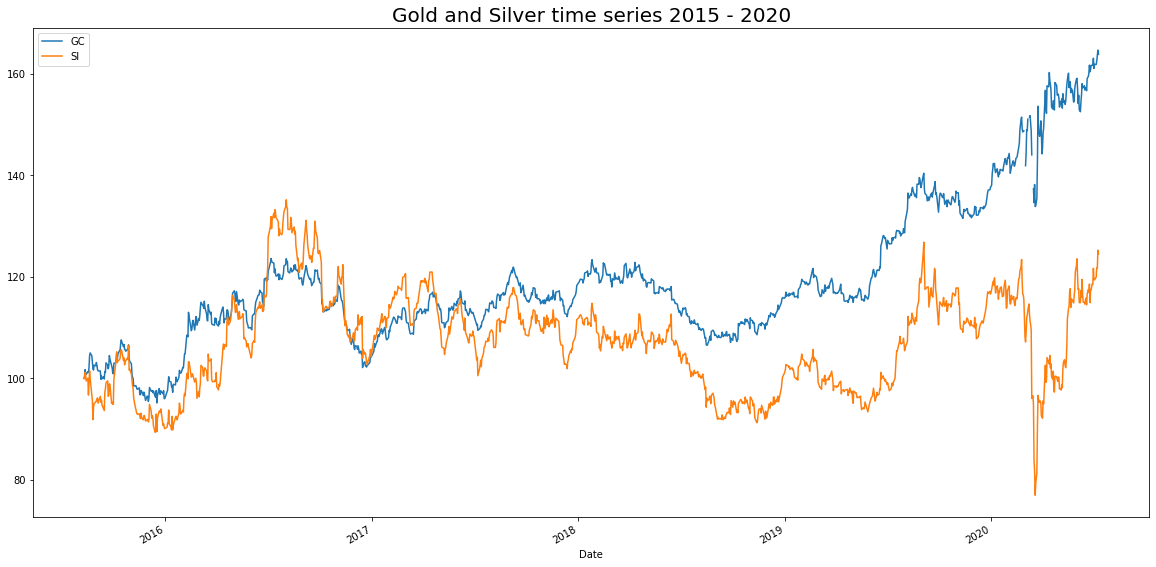

In [370]:
# Plot the time series in normalised fashion
norm = metal_prices / metal_prices.iloc[0] * 100
norm.plot(figsize=(20, 10))
plt.title('Gold and Silver time series 2015 - 2020', fontsize=20.0)

## Combining stocks and metals

In [302]:
# Left join the two DataFrames
snm_prices = prices.merge(metal_prices, on ='Date', how='left')
snm_prices.dropna(inplace=True)

In [303]:
# Compute the log returns
snm_log_r = np.log(snm_prices / snm_prices.shift(1))

In [304]:
# Inspect the correlation matrix
snm_log_r.corr()

,AMZN,GOOGL,JNJ,V,PG,UNH,JPM,HD,VZ,NFLX,...,PM,QCOM,LOW,BA,LMT,SBUX,UPS,CAT,GC,SI
AMZN,1.000000,0.688337,0.343984,0.527873,0.303187,0.399602,0.367595,0.436537,0.222625,0.573852,...,0.264349,0.365176,0.367985,0.305723,0.318326,0.422552,0.390378,0.402799,-0.027993,-0.002063
GOOGL,0.688337,1.000000,0.469166,0.717477,0.421958,0.532091,0.544074,0.587166,0.332705,0.531178,...,0.404148,0.473520,0.513830,0.460501,0.440386,0.576405,0.478313,0.507206,-0.013113,0.003121
JNJ,0.343984,0.469166,1.000000,0.515083,0.579234,0.506677,0.471015,0.454322,0.498714,0.242825,...,0.445859,0.372460,0.373462,0.369677,0.487740,0.450961,0.448712,0.422352,-0.006805,-0.051995
V,0.527873,0.717477,0.515083,1.000000,0.481101,0.591914,0.670816,0.672671,0.371590,0.431273,...,0.459742,0.504402,0.606685,0.559744,0.539455,0.651627,0.522841,0.564100,-0.031416,0.015670
PG,0.303187,0.421958,0.579234,0.481101,1.000000,0.416524,0.435253,0.468279,0.537700,0.215374,...,0.535917,0.348967,0.377134,0.341931,0.487684,0.458866,0.452368,0.366564,0.029323,-0.035904
UNH,0.399602,0.532091,0.506677,0.591914,0.416524,1.000000,0.558365,0.571564,0.380412,0.358980,...,0.456742,0.394856,0.531788,0.469219,0.464085,0.524106,0.458516,0.451504,-0.038929,-0.055768
JPM,0.367595,0.544074,0.471015,0.670816,0.435253,0.558365,1.000000,0.641759,0.405131,0.299699,...,0.462694,0.487547,0.605537,0.629389,0.526675,0.592394,0.555162,0.646160,-0.161175,-0.099281
HD,0.436537,0.587166,0.454322,0.672671,0.468279,0.571564,0.641759,1.000000,0.422131,0.368224,...,0.505274,0.500748,0.802906,0.563738,0.505244,0.621149,0.522373,0.514486,0.028407,0.029659
VZ,0.222625,0.332705,0.498714,0.371590,0.537700,0.380412,0.405131,0.422131,1.000000,0.150617,...,0.442595,0.300372,0.355256,0.294788,0.392249,0.386624,0.379723,0.339646,-0.020493,-0.034975
NFLX,0.573852,0.531178,0.242825,0.431273,0.215374,0.358980,0.299699,0.368224,0.150617,1.000000,...,0.224022,0.333388,0.327349,0.264229,0.278165,0.321491,0.315672,0.318307,-0.011412,0.006321


Both gold and silver seem to be slightly negatively correlated with many of the stocks, which makes their case slightly different from that of the cryptocurrencies. Let's see what happens at a portfolio level.

In [305]:
# Generate the return and volatility of 5000 random portfolios
snm_ptf_rs, snm_ptf_stds = generate_ptfs(snm_log_r, 5000)

In [306]:
# Obtain the number of assets used in this analysis
snm_num_assets = len(snm_prices.columns)

In [312]:
# Redefine the portfolio statistics function
def snm_ptf_stats(weights):
    weights = np.array(weights)
    ptf_r = np.sum(snm_log_r.mean() * weights) * 252
    ptf_std = np.sqrt(np.dot(weights.T, np.dot(snm_log_r.cov() * 252, weights)))
    return np.array([ptf_r, ptf_std, (ptf_r - 0.01) / ptf_std])

In [308]:
# Redefine the maximize Sharpe ratio function
def snm_max_sharpe(weights):
    return -snm_ptf_stats(weights)[2]

In [309]:
# Write the constraint that the weights have to add up to 1
snm_cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bound the weights (parameter inputs) to be within 0 and 1
snm_bnds = tuple((0, 1) for x in range(snm_num_assets))

In [310]:
# Starting parameter (weights) list as equal distribution
snm_starting_ws = snm_num_assets * [1. / snm_num_assets,]

In [313]:
# Call the minimisation function
snm_opts = sco.minimize(snm_max_sharpe, snm_starting_ws, method='SLSQP', bounds=snm_bnds, constraints=snm_cons)

In [314]:
# Obtain the optimal weights
snm_weights_opt = snm_opts['x'].round(3)
snm_weights_opt

array([0.325, 0.   , 0.   , 0.   , 0.006, 0.027, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.025, 0.   , 0.   ,
       0.   , 0.038, 0.135, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.444, 0.   ])

Gold now makes up a large proportion of the portfolio with 44.4%. Silver has a weight of zero and the weights for all stocks dropped significantly.

In [315]:
# Plug optimal weights into the statistics function
snm_ptf_stats(snm_weights_opt)

array([0.20355258, 0.13668219, 1.41607754])

In [481]:
# Redefine a function that minimises portfolio variance
def snm_min_var(weights):
    return snm_ptf_stats(weights)[1]**2

In [482]:
# Call the optimisation fcuntion
snm_min_var = sco.minimize(snm_min_var, snm_starting_ws, method='SLSQP', bounds=snm_bnds, constraints=snm_cons)

In [483]:
# Obtain the minimum variance weights
snm_weights_min_var = snm_min_var['x'].round(3)
snm_weights_min_var

array([0.031, 0.   , 0.052, 0.   , 0.005, 0.   , 0.008, 0.   , 0.123,
       0.   , 0.   , 0.041, 0.   , 0.009, 0.041, 0.046, 0.   , 0.   ,
       0.   , 0.006, 0.059, 0.009, 0.   , 0.   , 0.   , 0.   , 0.001,
       0.   , 0.04 , 0.   , 0.529, 0.   ])

For the allocation comparison table I will also include expected volatility and Sharpe ratio. This gives a more complete picture.

In [372]:
# Compute expected annual return and volatility for the metals
metal_log_r = np.log(metal_prices / metal_prices.shift(1))
metal_annual_r = metal_log_r.mean() * 252
metal_annual_std = np.sqrt(metal_log_r.var() * 252)

# Create an annualised volatility list for stocks and cryptos
combined_annual_std = np.sqrt(combined_log_r.var() * 252).round(3)

# Append the metal returns and volatilities
total_annual_r = combined_annual_r.append(metal_annual_r.round(3))
total_annual_std = combined_annual_std.append(metal_annual_std.round(3))
total_sharpe = (total_annual_r - 0.01)/total_annual_std

# Update the weights lists
total_weights_opt = np.append(add_weights_opt, [0, 0])
total_combined_weights_opt = np.append(combined_weights_opt,[0, 0])
total_snm_weights_opt = np.append(np.append(snm_weights_opt[:-2], [0, 0, 0, 0]),snm_weights_opt[-2:])

# Update columns list
total_columns = combined_prices.columns.append(metal_prices.columns)

In [373]:
# Create new composition DataFrame
final_composition = {'Expected Return': total_annual_r.round(3), 'Expected Volatility': total_annual_std, 'Sharpe Ratio': total_sharpe,
                     'Max. Sharpe Stocks Only': total_weights_opt, 'Max. Sharpe Stocks And Cryptos': total_combined_weights_opt.round(3), 
                     'Max. Sharpe Stocks and Gold': total_snm_weights_opt}
final_comp = pd.DataFrame(final_composition, columns=['Expected Return', 'Expected Volatility', 'Sharpe Ratio', 'Max. Sharpe Stocks Only', 
                                                  'Max. Sharpe Stocks And Cryptos', 'Max. Sharpe Stocks and Gold'], 
                                                  index=total_columns)
final_comp

,Expected Return,Expected Volatility,Sharpe Ratio,Max. Sharpe Stocks Only,Max. Sharpe Stocks And Cryptos,Max. Sharpe Stocks and Gold
AMZN,0.353,0.299,1.148362,0.577,0.506,0.325
GOOGL,0.163,0.264,0.578660,0.000,0.000,0.000
JNJ,0.102,0.201,0.459324,0.000,0.000,0.000
V,0.205,0.262,0.744661,0.000,0.000,0.000
PG,0.127,0.204,0.575661,0.055,0.036,0.006
UNH,0.197,0.288,0.649899,0.019,0.000,0.027
JPM,0.091,0.299,0.270749,0.000,0.000,0.000
HD,0.177,0.261,0.638853,0.000,0.000,0.000
VZ,0.077,0.195,0.344837,0.000,0.000,0.000
NFLX,0.277,0.413,0.647115,0.000,0.000,0.000


In [320]:
# Redefine the function that returns the volatility of a portfolio given a vector of weights
def snm_min_port(weights):
    return snm_ptf_stats(weights)[1]

In [317]:
# Generate assigned weights
snm_weights = np.random.random(snm_num_assets)

# Constrain these weights to add up to 1
snm_weights /= np.sum(snm_weights)

In [318]:
# Redefine the function to get the target returns and volatilities given a range of returns
def snm_efficient_frontier(start_r, end_r, steps):
    target_rs = np.linspace(start_r, end_r, steps)
    target_stds = []
    for r in target_rs:
        cons3 = ({'type': 'eq', 'fun': lambda x: snm_ptf_stats(x)[0] - r},
                {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bnds3 = tuple((0, 1) for x in snm_weights)
        res = sco.minimize(snm_min_port, snm_starting_ws, method='SLSQP', bounds = bnds3, constraints=cons3)
        target_stds.append(res['fun'])
    target_stds = np.array(target_stds)
    return target_rs, target_stds

In [321]:
# Obtain the target returns and volatilities based on 100 target returns for the combined portfolio
snm_target_rs, snm_target_stds = snm_efficient_frontier(0.0, 0.4, 100)

In [335]:
# Select the index of the absolute minimum variance portfolio
snm_min_var = np.argmin(snm_target_stds)

# Select expected volatilities for the stocks on the efficient frontier
snm_ex_stds = snm_target_stds[snm_min_var:-8]

# Select expected returns for the stocks on the efficient frontier
snm_ex_rs = snm_target_rs[snm_min_var:-8]

In [328]:
# Interpolate the B-spline representation of the data points for the combined portflio
snm_tck = sci.splrep(snm_ex_stds, snm_ex_rs)

In [329]:
# Obtain coordinates to be used for plotting the B-spline interpolation of the efficient frontier of the combined
# portfolio
snm_x_lower = min(snm_ex_stds)
snm_x_upper = max(snm_ex_stds)
snm_x_range = np.linspace(snm_x_lower, snm_x_upper, 500)
snm_bspline = sci.splev(snm_x_range, snm_tck)

Text(0.5, 1.0, 'Efficient Frontiers of Stocks-Only vs. Stocks and Cryptocurrencies vs. Stocks and Gold')

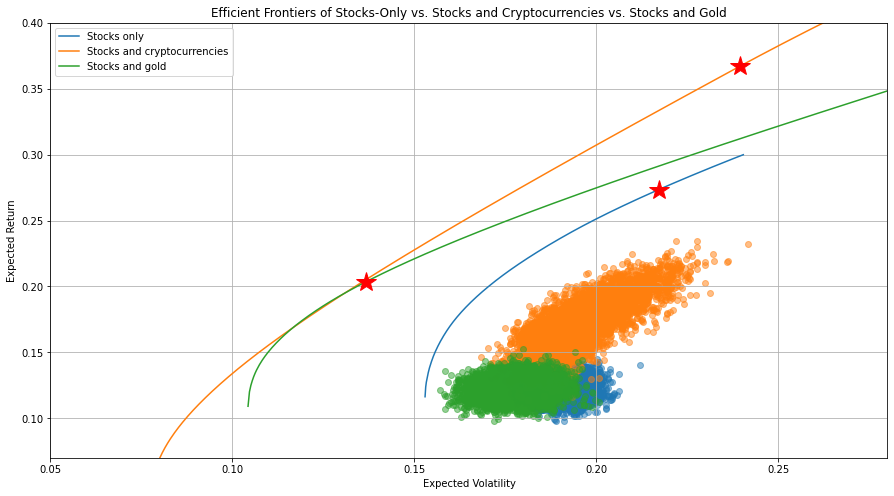

In [338]:
# Plot the B-spline interpolation of the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, marker='o', alpha=0.5) # Random portfolios with stocks only
plt.scatter(combined_ptf_stds, combined_ptf_rs, marker='o', alpha=0.5) # Random portfolios with stocks and cryptos
plt.scatter(snm_ptf_stds, snm_ptf_rs, marker='o', alpha=0.5) # Random portfolios with stocks and gold
plt.plot(x_range, bspline, label='Stocks only') # Efficient frontier with only stocks
plt.plot(combined_x_range, combined_bspline, label='Stocks and cryptocurrencies') # Efficient frontier with stocks and
# cryptos
plt.plot(snm_x_range, snm_bspline, label='Stocks and gold') # Efficient frontier with stocks and mgold
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=20.0) # Maximum Sharpe ratio portflio
# with stocks only
plt.plot(combined_ptf_stats(combined_opts['x'])[1], combined_ptf_stats(combined_opts['x'])[0], 'r*', markersize=20.0)
# Maximum Sharpe ratio portfolio with stocks and cryptos
plt.plot(snm_ptf_stats(snm_opts['x'])[1], snm_ptf_stats(snm_opts['x'])[0], 'r*', markersize=20.0)
# Maximum Sharpe ratio portfolio with stocks and gold
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.05, 0.28)
plt.ylim(0.07, 0.4)
plt.legend()
plt.title('Efficient Frontiers of Stocks-Only vs. Stocks and Cryptocurrencies vs. Stocks and Gold')

Text(0.5, 1.0, 'Zooming in on the Efficient Frontiers of Stocks and Cryptocurrencies vs. Stocks and Gold')

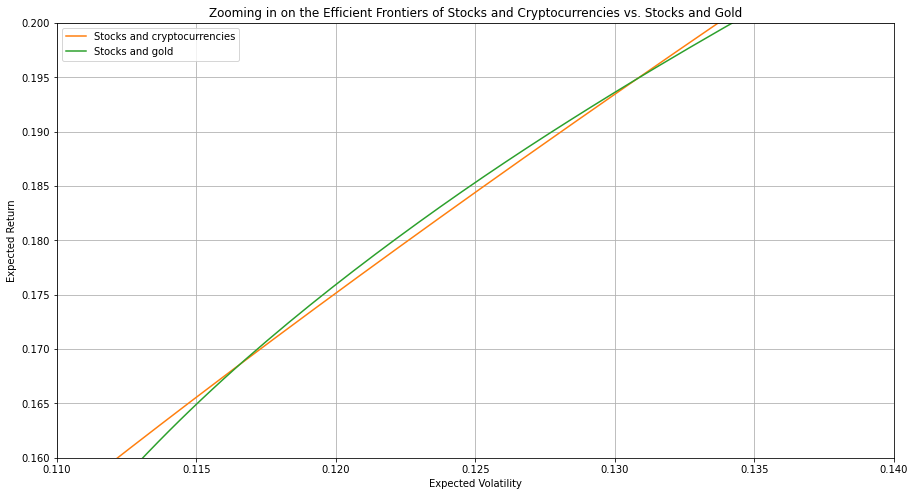

In [380]:
# Plot the B-spline interpolation of the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(combined_ptf_stds, combined_ptf_rs, marker='o', alpha=0.5) # Random portfolios with stocks and cryptos
plt.scatter(snm_ptf_stds, snm_ptf_rs, marker='o', alpha=0.5) # Random portfolios with stocks and gold
plt.plot(x_range, bspline) # Efficient frontier with only stocks
plt.plot(combined_x_range, combined_bspline, label='Stocks and cryptocurrencies') # Efficient frontier with stocks and
# cryptos
plt.plot(snm_x_range, snm_bspline, label='Stocks and gold') # Efficient frontier with stocks and mgold
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.11, 0.14)
plt.ylim(0.16, 0.2)
plt.legend()
plt.title('Zooming in on the Efficient Frontiers of Stocks and Cryptocurrencies vs. Stocks and Gold')

In [339]:
# Redefine the continuously differentiable function f(x) for the efficient frontier
def snm_f(x):
    return sci.splev(x, snm_tck, der=0)

# Redefine the first derivate function of f(x)
def snm_df(x):
    return sci.splev(x, snm_tck, der=1)

In [340]:
# Redefine the Capital Market Line conditions
def snm_cml_conditions(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - snm_f(p[2])
    eq3 = p[1] - snm_df(p[2])
    return eq1, eq2, eq3

In [341]:
# Solve for the parameters of the Capital Market Line
snm_cml = sco.fsolve(snm_cml_conditions, [0.01, 0.5, 0.15])

In [342]:
# Create input variable for CML
snm_cx = np.linspace(0.0, 0.3)

Text(0.5, 1.0, 'Capital Market Lines of Stocks-Only vs. Stocks and Cryptocurrencies vs. Stocks and Gold')

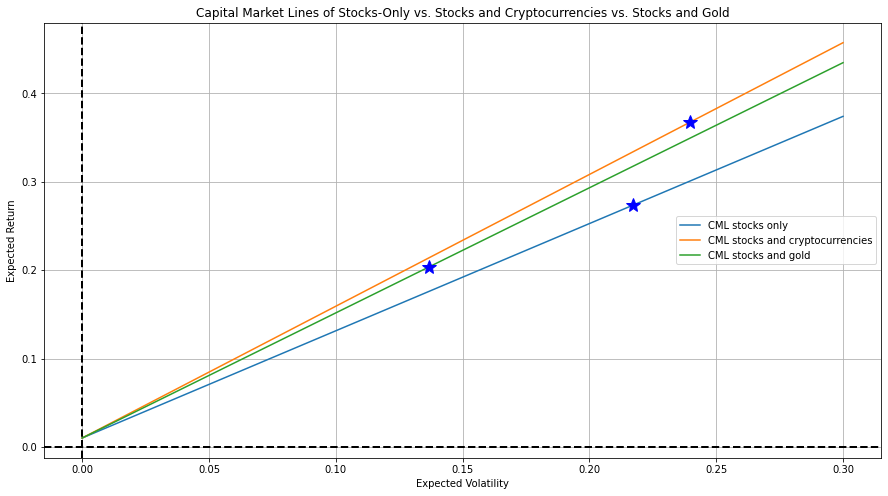

In [384]:
# Plot the "zoomed-out" view
plt.figure(figsize=(15, 8))
plt.plot(cx, cml[0] + cml[1] * cx, lw=1.5, label='CML stocks only') # Capital Market Line stock-only 
# portflio
plt.plot(combined_cx, combined_cml[0] + combined_cml[1] * combined_cx, lw=1.5, 
         label='CML stocks and cryptocurrencies') # Capital Market Line stocks and cryptos
plt.plot(snm_cx, combined_cml[0] + snm_cml[1] * snm_cx, lw=1.5, 
         label='CML stocks and gold') # Capital Market Line stocks and gold
plt.plot(cml[2], f(cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent line passes through rf
# stock-only portflio
plt.plot(combined_cml[2], combined_f(combined_cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent 
# line passes through rf combined portflio
plt.plot(snm_cml[2], snm_f(snm_cml[2]), 'b*', markersize=15.0) # Optimal portfolio where the tangent 
# line passes through rf combined portflio
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.legend()
plt.title('Capital Market Lines of Stocks-Only vs. Stocks and Cryptocurrencies vs. Stocks and Gold')

Finally, I will show why the assumption of normally distributed returns, while useful in theory, is not representative of the real world of finance that we live in.

In [390]:
# Import Seaborn
import seaborn as sns

In [489]:
# Compute some important statistics
amzn = log_r['AMZN'][1:]
amzn_std = amzn.std()
amzn_avg = amzn.mean()
amzn_range = [amzn_avg - 3 * amzn_std, amzn_avg + 3 * amzn_std]
amzn_min = min(amzn)
amzn_min_std = (amzn_avg - amzn_min) / amzn_std 
amzn_max = max(amzn)
amzn_max_std = (amzn_max - amzn_avg) / amzn_std 
amzn_max_std

6.524252906887165

The highest daily log return for Amazon is mroe than 6.5 standard deviations above the mean. That's an extreme outlier.

In [488]:
# Compute a normal distribution based on Amazon's stock returns' mean volatility
amzn_dist = np.random.normal(amzn_avg, amzn_std, 20000)

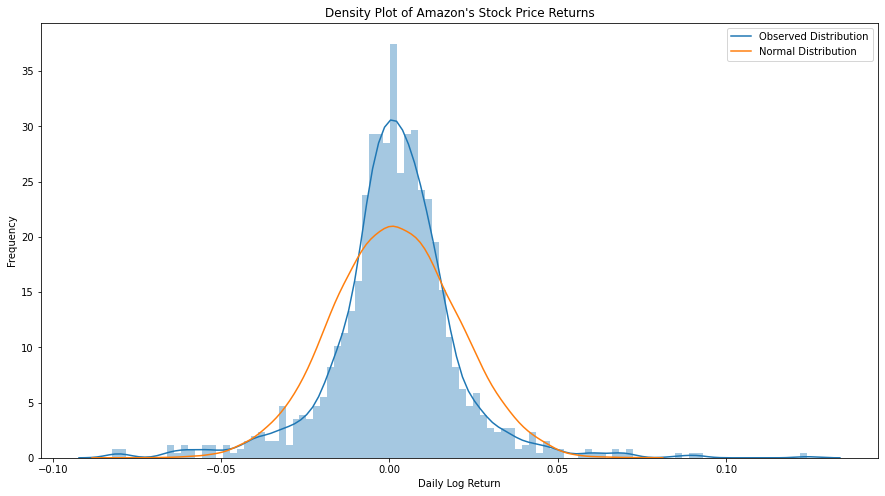

In [469]:
# Plot a histogram of Amazon's returns
amzn = log_r['AMZN'][1:]
plt.figure(figsize=(15,8))
sns.distplot(amzn, bins=100, kde_kws={'label':'Observed Distribution'})
sns.distplot(amzn_dist, hist=False, label='Normal Distribution')
plt.xlabel('Daily Log Return')
plt.ylabel('Frequency')
plt.title('Density Plot of Amazon\'s Stock Price Returns')
plt.legend()

In [471]:
# Compute the statistics for Bitcoin as well
btc = combined_log_r['BTC'][1:]
btc_std = btc.std()
btc_avg = btc.mean()
btc_range = [btc_avg - 3 * btc_std, btc_avg + 3 * btc_std]
btc_min = min(btc)
btc_min_std = (btc_avg - btc_min) / btc_std 
btc_min_std

9.880902993820824

The most negative daily log return for Bitcoin is almost 10 standard deviations below the mean, that's really extreme!

In [478]:
# Compute a normal distribution based on Bitcoin's price returns' mean volatility
btc_dist = np.random.normal(btc_avg, btc_std, 20000)

Text(0.5, 1.0, "Density Plot of Bitcoin's Price Returns")

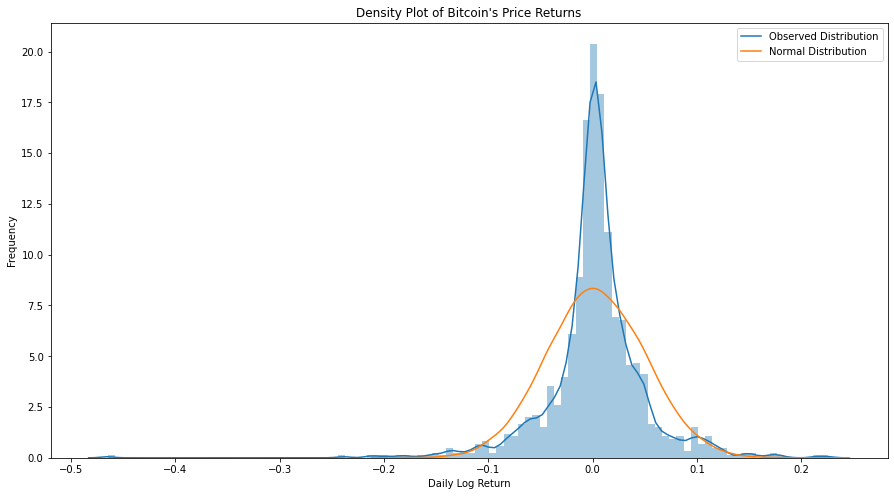

In [480]:
# Plot density distribution of Ethereum's returns
btc = combined_log_r['BTC'][1:]
plt.figure(figsize=(15,8))
sns.distplot(btc, bins=100, kde_kws={'label':'Observed Distribution'})
sns.distplot(btc_dist, hist=False, label='Normal Distribution')
plt.xlabel('Daily Log Return')
plt.ylabel('Frequency')
plt.title('Density Plot of Bitcoin\'s Price Returns')